In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')

In [2]:
df_copy = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df_copy['TotalCharges'] = df_copy['TotalCharges'].replace(" ",np.nan)

In [4]:
df_copy['TotalCharges']=df_copy['TotalCharges'].astype(float)

In [5]:
df_copy['TotalCharges']=df_copy['TotalCharges'].fillna(df_copy['TotalCharges'].median())

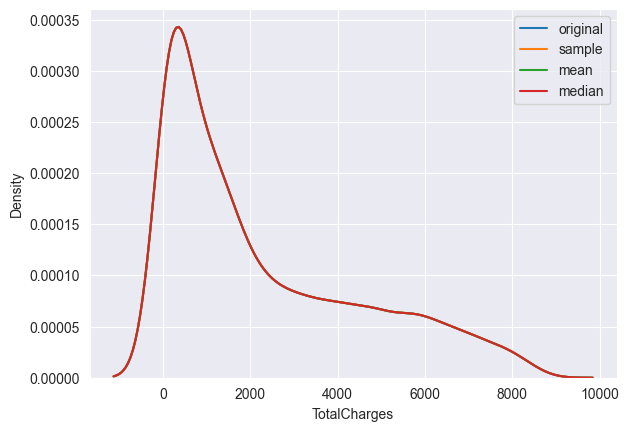

In [6]:
    sampled_vals = df_copy['TotalCharges'].dropna().sample(df_copy['TotalCharges'].isna().sum(), replace=True, random_state=42)
    sample_imputed = df_copy['TotalCharges'].copy()
    sample_imputed[df_copy['TotalCharges'].isna()] = sampled_vals.values
    sns.kdeplot(df_copy['TotalCharges'], label='original')
    sns.kdeplot(sample_imputed, label='sample')

    # Mean imputation
    mean_imputed = df_copy['TotalCharges'].fillna(df_copy['TotalCharges'].mean())
    sns.kdeplot(mean_imputed, label='mean')

    # Median imputation
    median_imputed = df_copy['TotalCharges'].fillna(df_copy['TotalCharges'].median())
    sns.kdeplot(median_imputed, label='median')
    
    plt.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [23]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges = df.TotalCharges.astype(float)
    df.TotalCharges.fillna(df['TotalCharges'].median(), inplace = True)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True,dtype=int)
    
    return df

In [24]:
df = datapreparation('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [26]:
df.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier , VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import optuna
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings("ignore") 

In [28]:
def outlier_det(x):
    for i in df_copy.select_dtypes(exclude='object').columns:
        q1=df_copy[i].quantile(0.25)
        q3=df_copy[i].quantile(0.75)
        iqr = q3-q1
        lower_fence = q1-1.5*iqr
        upper_fence = q3+1.5*iqr
        if df_copy[i].any()<lower_fence or df_copy[i].any()>upper_fence:
            print(f"Outliers present in {i}")
        else:
            print(f"No outlier detetected in {i}")

In [29]:
outlier_det(df_copy)

Outliers present in SeniorCitizen
No outlier detetected in tenure
No outlier detetected in MonthlyCharges
No outlier detetected in TotalCharges


In [31]:
X = df.drop(columns='Churn')
y = df["Churn"]

In [32]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [33]:
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()

# transform the dataset
X_train, y_train = sm.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After',counter)

Before Counter({0: 3892, 1: 1390})
After Counter({1: 3892, 0: 3892})


In [34]:
class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
    def train_model(self):
        self.model.fit(self.x_train,self.y_train)
        return self.model.predict(self.x_test)
    
    def evaluate_model(self, y_pred_class):
        print("\n")
        print("*"*30)
        self.result_metrics = self.evaluate_metrics(y_pred_class)
        print("*"*30)
        print("\n")
        
        self.classification_report(y_pred_class)
        print("*"*30)
        print("\n")
        self.confusion_matrix(y_pred_class)
            
        print("*"*30)
        print("\n")
        
        RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test)
        
        return self.result_metrics
        
    def evaluate_metrics(self, y_pred_class):
        result_metrics = [] 
        accuracy = accuracy_score(self.y_test, y_pred_class)
        precision = precision_score(self.y_test, y_pred_class)
        recall = recall_score(self.y_test, y_pred_class)
        f1score = f1_score(self.y_test, y_pred_class)
        y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
        roc_auc = roc_auc_score(self.y_test, y_pred_prob)
        
        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")
        
        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics
        
    def confusion_matrix(self, y_pred_class):
        cm = confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(cm,[0,1])
        
        
    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")
 
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
 
        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()
        
    def classification_report(self, y_pred_class):
        print(classification_report(self.y_test, y_pred_class))
               



******************************
Accuracy is : 77.3%
Precision is : 58.5%
Recall is : 56.8%
F1 Score is : 57.6%
Roc-Auc Score is:82.2%
******************************


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1282
           1       0.58      0.57      0.58       479

    accuracy                           0.77      1761
   macro avg       0.71      0.71      0.71      1761
weighted avg       0.77      0.77      0.77      1761

******************************




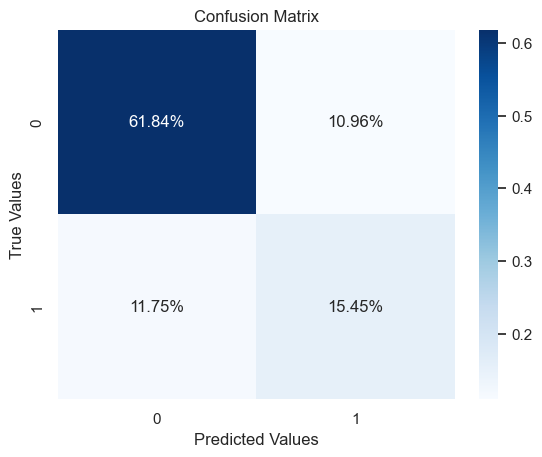

******************************




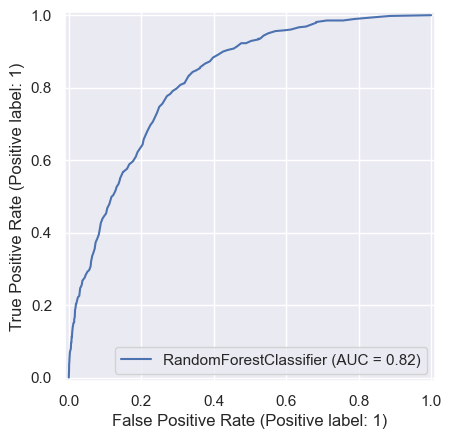

In [35]:
rf = RandomForestClassifier( random_state=42, criterion="gini" ,)
rf_modebuilder = ModelBuilder(rf, X_train, X_test, y_train, y_test)
y_pred_class  = rf_modebuilder.train_model()
rf_metrics = rf_modebuilder.evaluate_model(y_pred_class)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3892, number of negative: 3892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 7784, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


******************************
Accuracy is : 78.3%
Precision is : 59.6%
Recall is : 62.6%
F1 Score is : 61.1%
Roc-Auc Score is:83.6%
******************************


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1282
           1       0.60      0.63      0.61       479

    accuracy                           0.78      1761
   macro avg       0.73      0.73  

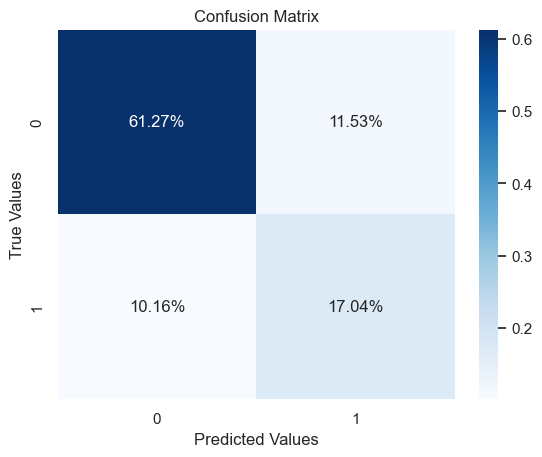

******************************




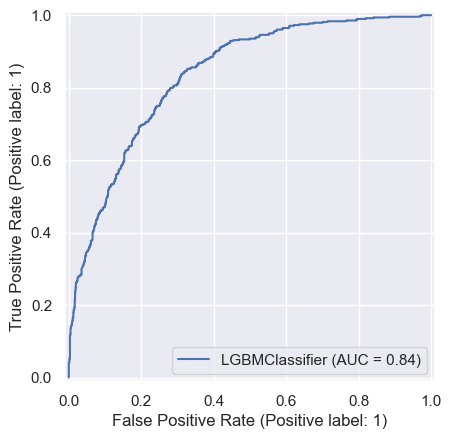

In [36]:
lgbm = LGBMClassifier()
lgbm_modebuilder = ModelBuilder(lgbm, X_train, X_test, y_train, y_test)
y_pred_class  = lgbm_modebuilder.train_model()
lgbm_metrics = lgbm_modebuilder.evaluate_model(y_pred_class)



******************************
Accuracy is : 77.2%
Precision is : 58.4%
Recall is : 55.9%
F1 Score is : 57.1%
Roc-Auc Score is:81.9%
******************************


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1282
           1       0.58      0.56      0.57       479

    accuracy                           0.77      1761
   macro avg       0.71      0.71      0.71      1761
weighted avg       0.77      0.77      0.77      1761

******************************




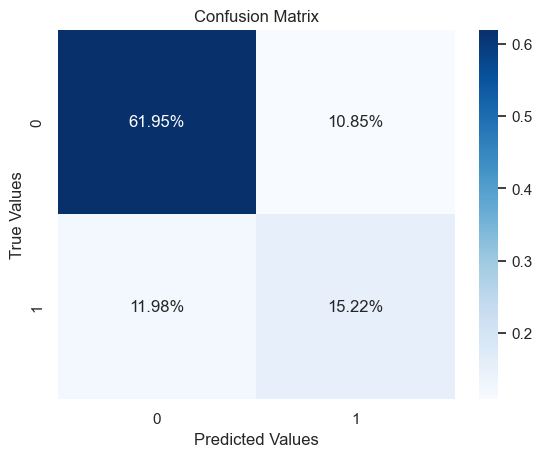

******************************




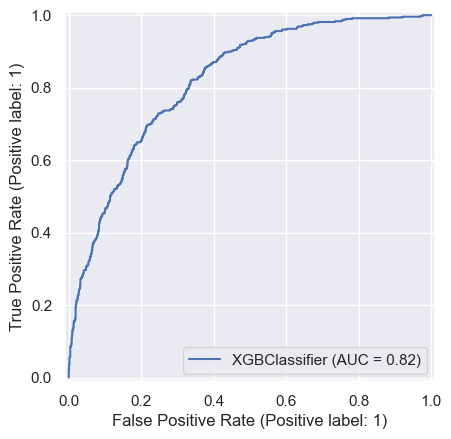

In [37]:
xg = XGBClassifier()
xgb_modebuilder = ModelBuilder(xg, X_train, X_test, y_train, y_test)
y_pred_class  = xgb_modebuilder.train_model()
xgb_metrics = xgb_modebuilder.evaluate_model(y_pred_class)

In [38]:
# LETS TRY OPTUNA to get the best model with hyperparameters (above we used gridsearch and default params)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [39]:
def objective(trial):
        model_name = trial.suggest_categorical("model",["SVC","RF","KNN","GB","XGB","LGBM"])

        if model_name == "SVC":
            kernel_svm = trial.suggest_categorical("kernel_svc",["linear","poly","rbf"])
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear",0,5)
                model = SVC(C=c_linear,kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly",0,10)
                degree_poly = trial.suggest_int("degree_poly",1,3)
                model = SVC(C=c_poly,degree=degree_poly,
                            kernel="poly")

            else:
                c_rbf = trial.suggest_float("c_rbf",0,100)
                gamma_rbf = trial.suggest_float("gamma_rbf",0,3)
                model = SVC(C=c_rbf,gamma=gamma_rbf,
                            kernel="rbf")
                

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,100)
            max_depth_rf = trial.suggest_int("max_depth_rf",2,10)
            model = RandomForestClassifier(n_estimators=n_estimators_rf,
                                        max_depth=max_depth_rf,
                                        random_state=42,
                                        n_jobs=-1)

        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,100)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",0,1)
            max_depth_gb = trial.suggest_int("max_depth_gb",2,20)
            model = GradientBoostingClassifier(n_estimators=n_estimators_gb,
                                                learning_rate=learning_rate_gb,
                                                max_depth=max_depth_gb,
                                                random_state=42)

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn",1,20)
            weights_knn = trial.suggest_categorical("weights_knn",["uniform","distance"])
            model = KNeighborsClassifier(n_neighbors=n_neighbors_knn,
                                        weights=weights_knn,n_jobs=-1)

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,150)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",0.1,0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",2,15)
            model = XGBClassifier(n_estimators=n_estimators_xgb,
                                    learning_rate=learning_rate_xgb,
                                    max_depth=max_depth_xgb,
                                    random_state=42,
                                    n_jobs=-1)

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm",10,200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm",0.1,0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm",2,20)
            model = LGBMClassifier(n_estimators=n_estimators_lgbm,
                                    learning_rate=learning_rate_lgbm,
                                    max_depth=max_depth_lgbm,
                                    random_state=42,n_jobs=-1)


        # train the model
        model.fit(X_train,y_train)


        # get the predictions
        y_pred_train = model.predict(X_train)
        y_pred_test= model.predict(X_test)

        # calculate the error
        score = accuracy_score(y_test,y_pred_test)

        return score

In [15]:
study = optuna.create_study(direction="maximize",study_name="model_selection")

# optimize the objective function
study.optimize(objective,n_trials=30,n_jobs=-1)

[I 2025-07-09 18:03:29,746] A new study created in memory with name: model_selection
[I 2025-07-09 18:03:31,083] Trial 2 finished with value: 0.7677455990914254 and parameters: {'model': 'XGB', 'n_estimators_xgb': 22, 'learning_rate_xgb': 0.3807770244090003, 'max_depth_xgb': 11}. Best is trial 2 with value: 0.7677455990914254.
[I 2025-07-09 18:03:31,176] Trial 3 finished with value: 0.7705848949460534 and parameters: {'model': 'XGB', 'n_estimators_xgb': 27, 'learning_rate_xgb': 0.20345745463292397, 'max_depth_xgb': 9}. Best is trial 3 with value: 0.7705848949460534.
[I 2025-07-09 18:03:31,330] Trial 1 finished with value: 0.7853492333901193 and parameters: {'model': 'XGB', 'n_estimators_xgb': 50, 'learning_rate_xgb': 0.47483986570730286, 'max_depth_xgb': 3}. Best is trial 1 with value: 0.7853492333901193.
[I 2025-07-09 18:03:31,939] Trial 8 finished with value: 0.7654741624077229 and parameters: {'model': 'XGB', 'n_estimators_xgb': 10, 'learning_rate_xgb': 0.40376200410981344, 'max_dep

In [16]:
study.best_value

0.7853492333901193

In [25]:
study.best_params

{'model': 'XGB',
 'n_estimators_xgb': 50,
 'learning_rate_xgb': 0.47483986570730286,
 'max_depth_xgb': 3}

In [40]:
sc = StackingClassifier(estimators=[('xgb',xg),('rf',rf)],final_estimator=lgbm,cv=5)

[LightGBM] [Info] Number of positive: 3892, number of negative: 3892
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 7784, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


******************************
Accuracy is : 77.3%
Precision is : 58.9%
Recall is : 54.5%
F1 Score is : 56.6%
Roc-Auc Score is:81.8%
******************************


              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1282
           1       0.59      0.54      0.57       479

    accuracy                           0.77      1761
   macro avg       0.71      0.70      0.71      1761
weighted avg       0.77      0.77      0.77      1761

******************************




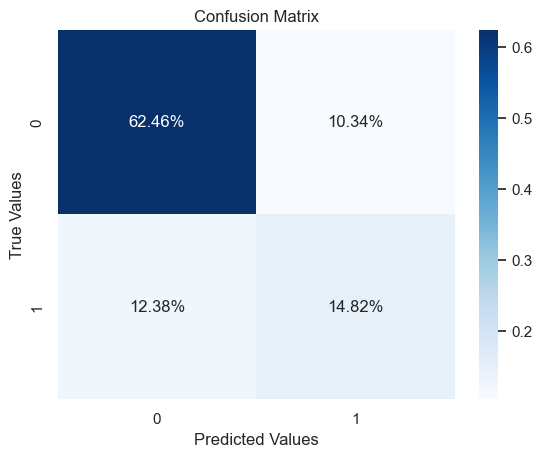

******************************




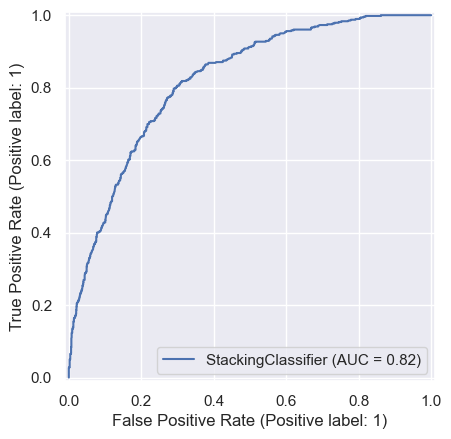

In [41]:
sc_modebuilder = ModelBuilder(sc, X_train, X_test, y_train, y_test)
y_pred_class  = sc_modebuilder.train_model()
sc_metrics = sc_modebuilder.evaluate_model(y_pred_class)

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(rf,k_features='best',forward=True,floating=False,n_jobs=-1,cv=5)
sfs.fit(X_train,y_train)
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[0.6795118818240206, 0.6621708413615928, 0.656...",0.666238,"(tenure,)",0.009852,0.007665,0.003833
2,"(4, 15)","[0.720616570327553, 0.7199743095696853, 0.7456...",0.741396,"(tenure, TotalCharges)",0.023396,0.018203,0.009102
3,"(4, 14, 15)","[0.7398843930635838, 0.7430956968529223, 0.786...",0.767217,"(tenure, MonthlyCharges, TotalCharges)",0.027233,0.021189,0.010594
4,"(4, 14, 15, 18)","[0.7475915221579962, 0.7572254335260116, 0.813...",0.785203,"(tenure, MonthlyCharges, TotalCharges, Contrac...",0.034957,0.027198,0.013599
5,"(4, 7, 14, 15, 18)","[0.7533718689788054, 0.7578676942838792, 0.826...",0.795096,"(tenure, OnlineSecurity, MonthlyCharges, Total...",0.041949,0.032637,0.016319
6,"(2, 4, 7, 14, 15, 18)","[0.7591522157996147, 0.7565831727681439, 0.848...",0.805373,"(Partner, tenure, OnlineSecurity, MonthlyCharg...",0.050505,0.039295,0.019647
7,"(2, 4, 7, 14, 15, 18, 19)","[0.7732819524727039, 0.76043673731535, 0.85035...",0.813595,"(Partner, tenure, OnlineSecurity, MonthlyCharg...",0.049582,0.038577,0.019288
8,"(2, 4, 5, 7, 14, 15, 18, 19)","[0.7687861271676301, 0.766859344894027, 0.8580...",0.819763,"(Partner, tenure, PhoneService, OnlineSecurity...",0.054648,0.042518,0.021259
9,"(2, 4, 5, 7, 12, 14, 15, 18, 19)","[0.7662170841361593, 0.7636480411046885, 0.872...",0.824002,"(Partner, tenure, PhoneService, OnlineSecurity...",0.062309,0.048478,0.024239
10,"(2, 4, 5, 7, 12, 14, 15, 16, 18, 19)","[0.7649325626204239, 0.7636480411046885, 0.870...",0.825031,"(Partner, tenure, PhoneService, OnlineSecurity...",0.063841,0.04967,0.024835


In [43]:
list(sfs.k_feature_idx_) # best features 

[0, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [44]:
X_train_sfs = X_train.iloc[:,list(sfs.k_feature_idx_)]
X_test_sfs = X_test.iloc[:,list(sfs.k_feature_idx_)]



******************************
Accuracy is : 77.5%
Precision is : 58.7%
Recall is : 58.7%
F1 Score is : 58.7%
Roc-Auc Score is:82.7%
******************************


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1282
           1       0.59      0.59      0.59       479

    accuracy                           0.78      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.78      0.78      0.78      1761

******************************




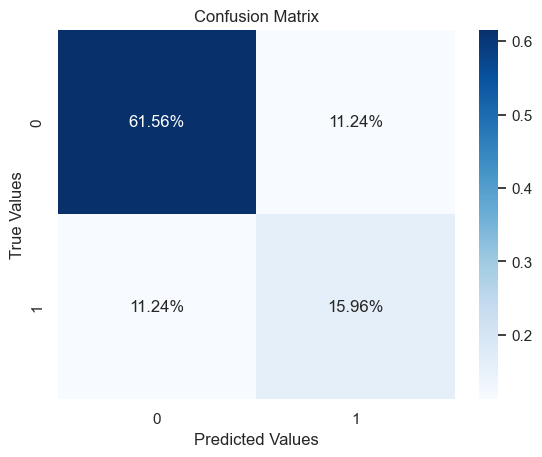

******************************




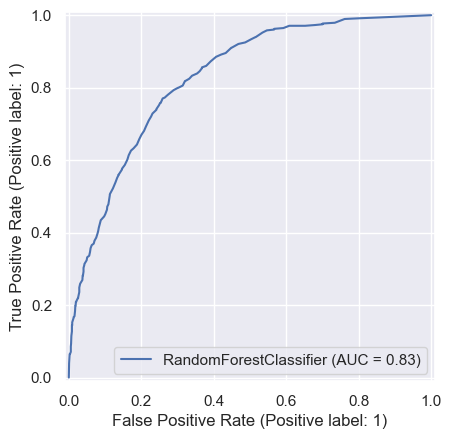

In [45]:
rf_modebuilder = ModelBuilder(rf, X_train_sfs, X_test_sfs, y_train, y_test)
y_pred_class  = rf_modebuilder.train_model()
rf_metrics = rf_modebuilder.evaluate_model(y_pred_class)

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid3 = {'max_features':['sqrt','log2'],
          'n_estimators':[950,1000,1050],
           'criterion': ['entropy'],    
          'max_depth': [10],
          'min_samples_leaf': [1, 3, 5, 7],
          'min_samples_split': [2, 4, 6, 8]
         }

grid3 = GridSearchCV(estimator=rf, param_grid=param_grid3, n_jobs=-1, cv=5, verbose=1, scoring = 'f1')

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [950, 1000, 1050]},
             scoring='f1', verbose=1)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


******************************
Accuracy is : 77.5%
Precision is : 57.0%
Recall is : 70.1%
F1 Score is : 62.9%
Roc-Auc Score is:84.5%
******************************


              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1282
           1       0.57      0.70      0.63       479

    accuracy                           0.78      1761
   macro avg       0.72      0.75      0.73      1761
weighted avg       0.79      0.78      0.78      1761

******************************




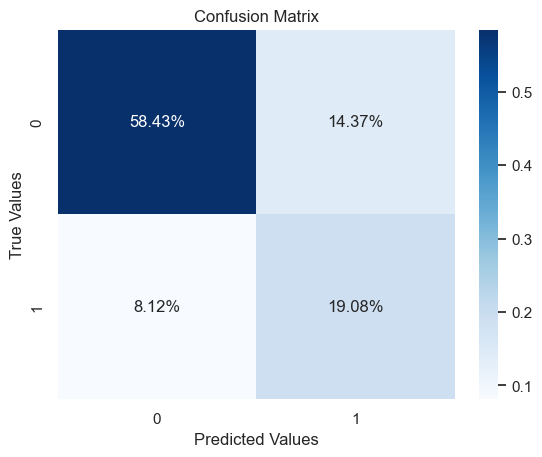

******************************




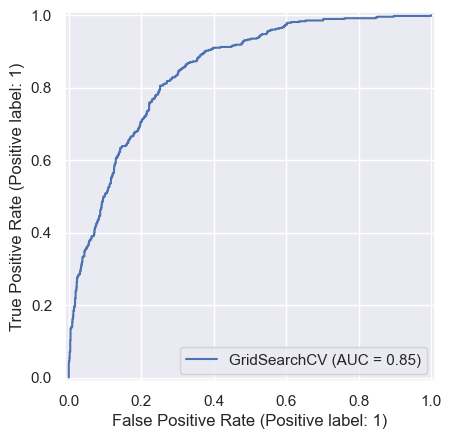

In [24]:
rf_best = ModelBuilder(grid3, X_train_sfs, X_test_sfs, y_train, y_test)
y_pred_class  = rf_best.train_model()
rf_best_metrics = rf_best.evaluate_model(y_pred_class)

In [26]:
param_xg = {
 'n_estimators': 50,
 'learning_rate': 0.47483986570730286,
 'max_depth': 3 }
xg_optuna = XGBClassifier(**param_xg)



******************************
Accuracy is : 78.6%
Precision is : 59.5%
Recall is : 66.6%
F1 Score is : 62.9%
Roc-Auc Score is:83.5%
******************************


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1282
           1       0.60      0.67      0.63       479

    accuracy                           0.79      1761
   macro avg       0.73      0.75      0.74      1761
weighted avg       0.79      0.79      0.79      1761

******************************




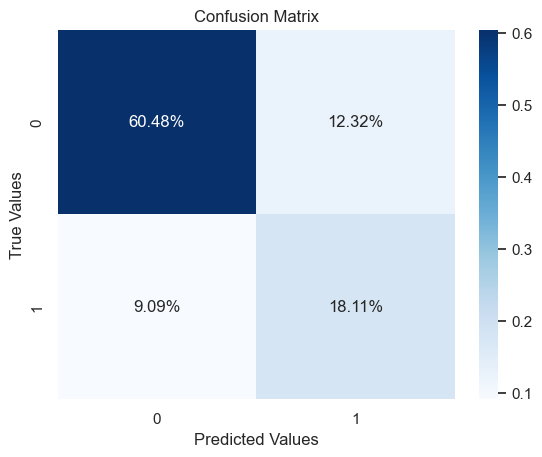

******************************




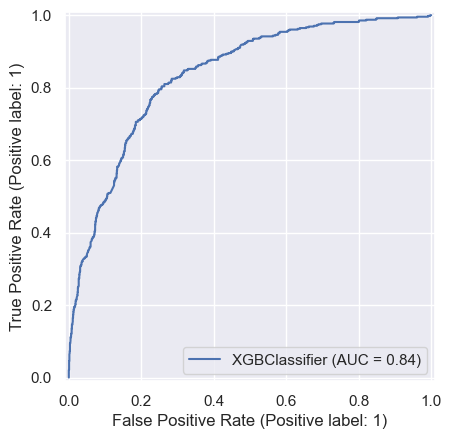

In [27]:
xg_opt = ModelBuilder(xg_optuna, X_train_sfs, X_test_sfs, y_train, y_test)
y_pred_class  = xg_opt.train_model()
xg_opt_best_metrics = xg_opt.evaluate_model(y_pred_class)

In [28]:
# XGBOOST gives accuracy of 78.6% with 67% recall

In [35]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))


In [37]:
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Build Neural Network
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[es],class_weight=class_weights,
                    verbose=1)

# Step 10: Predict and evaluate
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5938 - loss: 0.6945 - val_accuracy: 0.8176 - val_loss: 0.4978
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7794 - loss: 0.4626 - val_accuracy: 0.8805 - val_loss: 0.3809
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7821 - loss: 0.4581 - val_accuracy: 0.8671 - val_loss: 0.3509
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7931 - loss: 0.4333 - val_accuracy: 0.8953 - val_loss: 0.2935
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.4303 - val_accuracy: 0.8838 - val_loss: 0.3029
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7873 - loss: 0.4352 - val_accuracy: 0.8927 - val_loss: 0.2832
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.4262 - val_accuracy: 0.8850 - val_loss: 0.3019
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7969 - loss: 0.4123 - val_accuracy: 0.8863 - v

In [46]:
pip install catboost


   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB 495.5 kB/s eta 0:03:27
   ---------------------------------------- 0.3/102.5 MB 2.8 MB/s eta 0:00:37
    --------------------------------------- 1.8/102.5 MB 12.7 MB/s eta 0:00:08
    --------------------------------------- 2.1/102.5 MB 13.3 MB/s eta 0:00:08
    --------------------------------------- 2.1/102.5 MB 13.3 MB/s eta 0:00:08
    --------------------------------------- 2.1/102.5 MB 13.3 MB/s eta 0:00:08
    --------------------------------------- 2.1/102.5 MB 13.3 MB/s eta 0:00:08
    --------------------------------------- 2.1/102.5 MB 13.3 MB/s eta 0:00:08
    --------------------------------------- 2.1/102.5 MB 13.3 MB/s eta 0:00:08
   - -------------------------------------- 3.2/102.5 MB 7.0 MB/s eta 0:00:15
   - -------------------------------------- 4.4/102.5 MB 9.1 MB/s eta

In [63]:
from catboost import CatBoostClassifier, Pool
cat_features = df_copy.select_dtypes(include='object').columns[:-1].tolist()
X = df_copy.drop('Churn', axis=1)
y = df_copy['Churn']
from sklearn.preprocessing import LabelEncoder

# Convert 'Yes' -> 1, 'No' -> 0
le = LabelEncoder()
y = le.fit_transform(df['Churn'])  # y will be 0/1 now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = CatBoostClassifier(verbose=0)  # Set verbose=100 for progress
model.fit(X_train, y_train, cat_features=cat_features)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Recall',recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8119233498935415
Recall 0.5549597855227882
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



{0: 0, 1: 1}
